In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
# Load major datasets
orders = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_orders.csv')
order_items = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_order_items.csv')
products = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_products.csv')
customers = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_customers.csv')
inventory = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_inventory.csv')
delivery = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_delivery_performance.csv')
feedback = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_customer_feedback.csv')
marketing = pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_marketing_performance.csv')
category_icons = pd.read_excel('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/Category_Icons.xlsx')
rating_icons = pd.read_excel('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/Rating_Icon.xlsx')

In [ ]:
import pandas as pd

datasets = {
    'Orders': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_orders.csv'),
    'Order Items': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_order_items.csv'),
    'Products': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_products.csv'),
    'Customers': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_customers.csv'),
    'Inventory': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_inventory.csv'),
    'Inventory New': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_inventoryNew.csv'),
    'Delivery Performance': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_delivery_performance.csv'),
    'Customer Feedback': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_customer_feedback.csv'),
    'Marketing Performance': pd.read_csv('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/blinkit_marketing_performance.csv'),
    'Category Icons': pd.read_excel('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/Category_Icons.xlsx'),
    'Rating Icons': pd.read_excel('C:/Users/abhis/Desktop/data_analysis/blinkit-sales-analysis/data/raw/Rating_Icon.xlsx')
}

# Overview function
def basic_data_overview(df, name):
    print(f"Dataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSample Data:\n", df.head(3))
    print("-"*60, "\n")

# Apply to all datasets
for name, df in datasets.items():
    basic_data_overview(df, name)



## Sales & Revenue KPIs

### 1. Total Revenue -	Total sales amount over a period. -	Sum of total_price from blinkit_orders.csv
### 2. Average Order Value (AOV) -	How much customers spend per order. -	Total Revenue ÷ Number of Orders
### 3. Number of Orders -	Total orders placed. -	Count of order_id
### 4. Top-Selling Products	- Products with highest quantity sold. -	Sum of quantity from blinkit_order_items.csv grouped by product_id
### 5. Top Categories by Revenue -	Best-performing product categories. -	Join order_items and products, group by category
### 6. Sales Growth Rate -	Growth of revenue month-over-month.	 - (This Month’s Revenue - Last Month’s Revenue) ÷ Last Month’s Revenue


In [16]:
# Total Revenue
print("Columns in orders DataFrame:",orders.columns)
total_revenue = orders['order_total'].sum()
print(f"Total Revenue: ₹{total_revenue:,.2f}")

Columns in orders DataFrame: Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id'],
      dtype='object')
Total Revenue: ₹11,009,308.50


In [19]:
# Average Order Value (AOV)
average_order_value = orders['order_total'].mean()
print(f"Average Order Value: ₹{average_order_value:.2f}")

Average Order Value: ₹2201.86


In [20]:
# Number of Orders
num_orders = orders['order_id'].nunique()
print(f"Number of Orders: {num_orders}")

Number of Orders: 5000



📦🚶‍➡️ Top-Selling Products:
   product_id  quantity    product_name
0       51036        70       Baby Food
1      820973        68      Baby Wipes
2      604184        62  Toilet Cleaner
3       34186        61         Mangoes
4      992178        60   Pain Reliever
5      880510        58           Bread
6      673058        56     Cough Syrup
7       89084        56            Milk
8      123983        55     Cough Syrup
9      654623        55           Chips


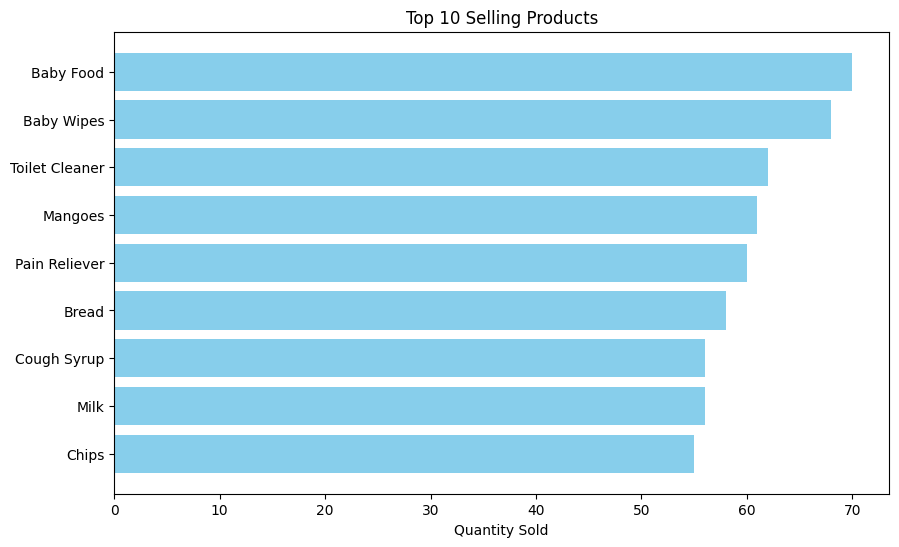

In [25]:
# Top-Selling Products
print("\n📦🚶‍➡️ Top-Selling Products:")

# Group by product_id, sum quantity
top_products = (
    order_items.groupby('product_id')['quantity']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Merge with product names
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Show Top 10 Products
print(top_products.head(10))

# Plot Top 10 Products
plt.figure(figsize=(10, 6))
plt.barh(top_products['product_name'].head(10), top_products['quantity'].head(10), color='skyblue')
plt.xlabel('Quantity Sold')
plt.title('Top 10 Selling Products')
plt.gca().invert_yaxis()
plt.show()


🛒 Top Categories by Revenue:
               category  item_revenue
0     Dairy & Breakfast     639222.19
1              Pharmacy     592368.57
2   Fruits & Vegetables     559053.08
3              Pet Care     539888.75
4        Household Care     444244.25
5         Personal Care     394894.61
6     Snacks & Munchies     394648.71
7  Cold Drinks & Juices     392717.62
8     Grocery & Staples     359937.82
9             Baby Care     348227.18


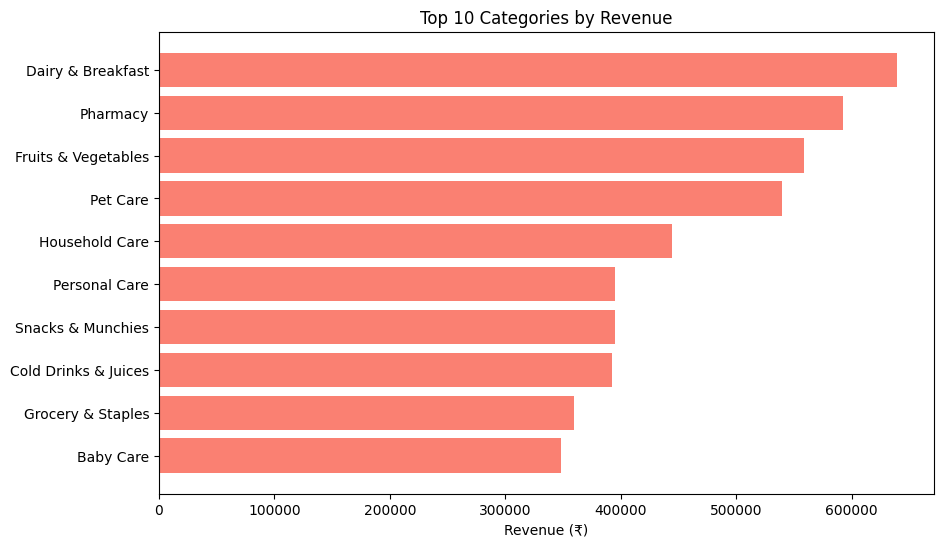

In [29]:
#  Top Categories by Revenue
print("\n🛒 Top Categories by Revenue:")

# Calculate revenue at item level
order_items['item_revenue'] = order_items['unit_price'] * order_items['quantity']

# Merge with product info to get categories
merged = order_items.merge(products[['product_id', 'category']], on='product_id', how='left')

# Group by category, sum revenue
top_categories = (
    merged.groupby('category')['item_revenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Show Top 10 Categories
print(top_categories.head(10))

# Plot Top 10 Categories
plt.figure(figsize=(10, 6))
plt.barh(top_categories['category'].head(10), top_categories['item_revenue'].head(10), color='salmon')
plt.xlabel('Revenue (₹)')
plt.title('Top 10 Categories by Revenue')
plt.gca().invert_yaxis()
plt.show()



📈 Sales Growth Rate:
            Monthly Revenue  Growth Rate (%)
order_date                                  
2023-03-31        272878.96              NaN
2023-04-30        554344.77       103.146761
2023-05-31        608213.54         9.717557
2023-06-30        505227.66       -16.932520
2023-07-31        567639.91        12.353292
2023-08-31        623472.35         9.835891
2023-09-30        571117.81        -8.397251
2023-10-31        578369.83         1.269794
2023-11-30        567783.74        -1.830332
2023-12-31        615709.03         8.440765
2024-01-31        560423.56        -8.979155
2024-02-29        545090.11        -2.736047
2024-03-31        543181.85        -0.350082
2024-04-30        538754.75        -0.815031
2024-05-31        574163.61         6.572352
2024-06-30        539074.85        -6.111282
2024-07-31        573111.98         6.313990
2024-08-31        546194.57        -4.696710
2024-09-30        518695.03        -5.034752
2024-10-31        537702.94      

C:\Users\abhis\AppData\Local\Temp\ipykernel_16740\1736641741.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = orders['order_total'].resample('M').sum()


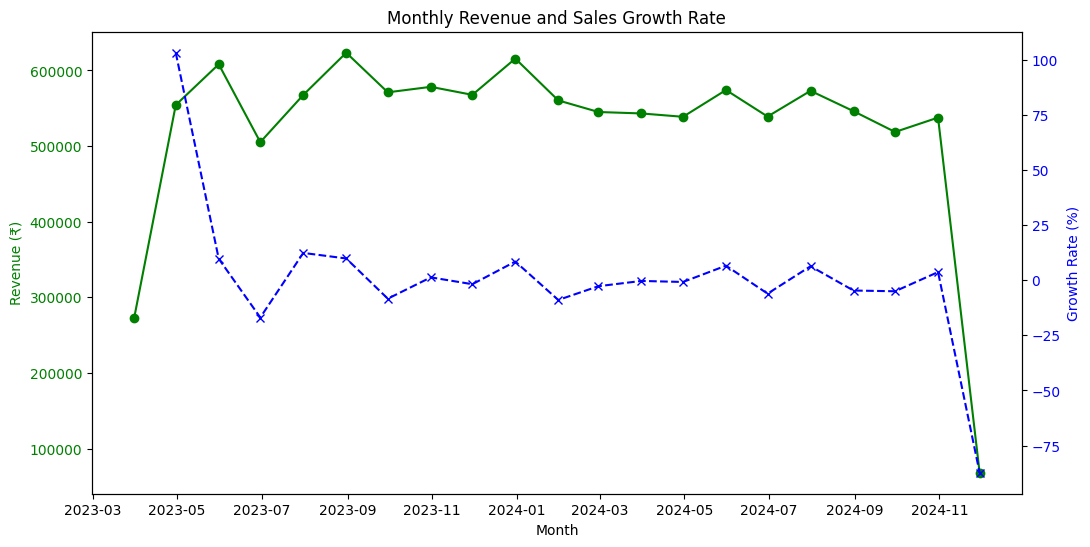

In [30]:
# Sales Growth Rate (Month-on-Month)
print("\n📈 Sales Growth Rate:")

# Make sure 'order_date' is datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Set index as date
orders.set_index('order_date', inplace=True)

# Monthly revenue
monthly_revenue = orders['order_total'].resample('M').sum()

# Monthly Growth Rate
sales_growth = monthly_revenue.pct_change() * 100  # in percentage

# Combine into one DataFrame
sales_summary = pd.DataFrame({
    'Monthly Revenue': monthly_revenue,
    'Growth Rate (%)': sales_growth
})

print(sales_summary)

# Plot Revenue and Growth Rate
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Revenue
ax1.plot(monthly_revenue.index, monthly_revenue, color='green', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (₹)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('Monthly Revenue and Sales Growth Rate')

# Plot Growth Rate
ax2 = ax1.twinx()
ax2.plot(sales_growth.index, sales_growth, color='blue', linestyle='--', marker='x')
ax2.set_ylabel('Growth Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.show()


📅 Weekly and Quarterly Trends:


C:\Users\abhis\AppData\Local\Temp\ipykernel_16740\1580967726.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_revenue = orders['order_total'].resample('Q').sum()


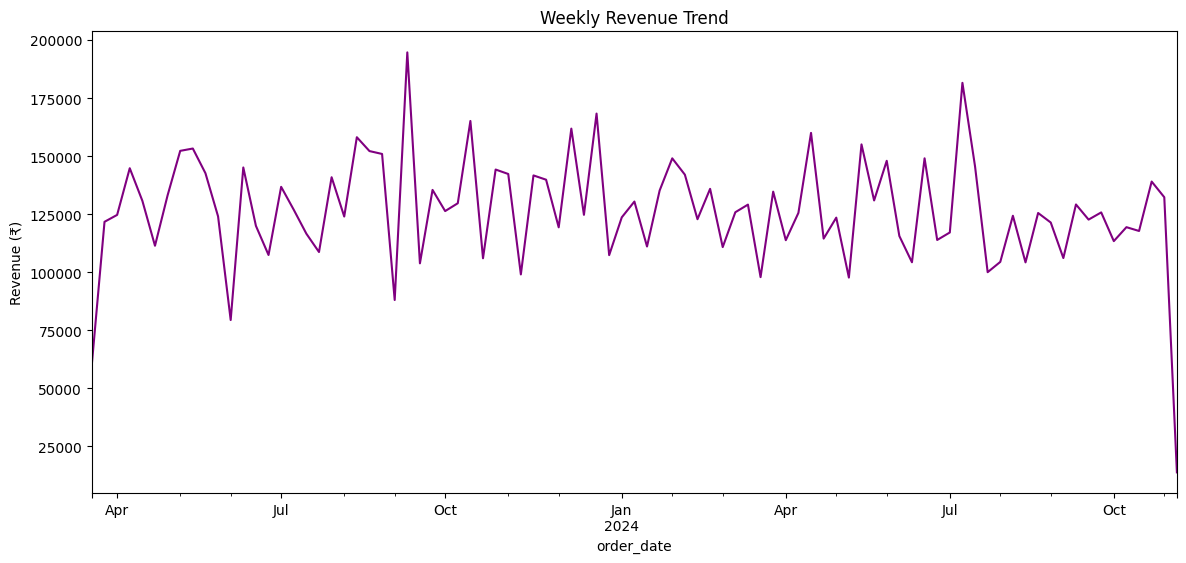

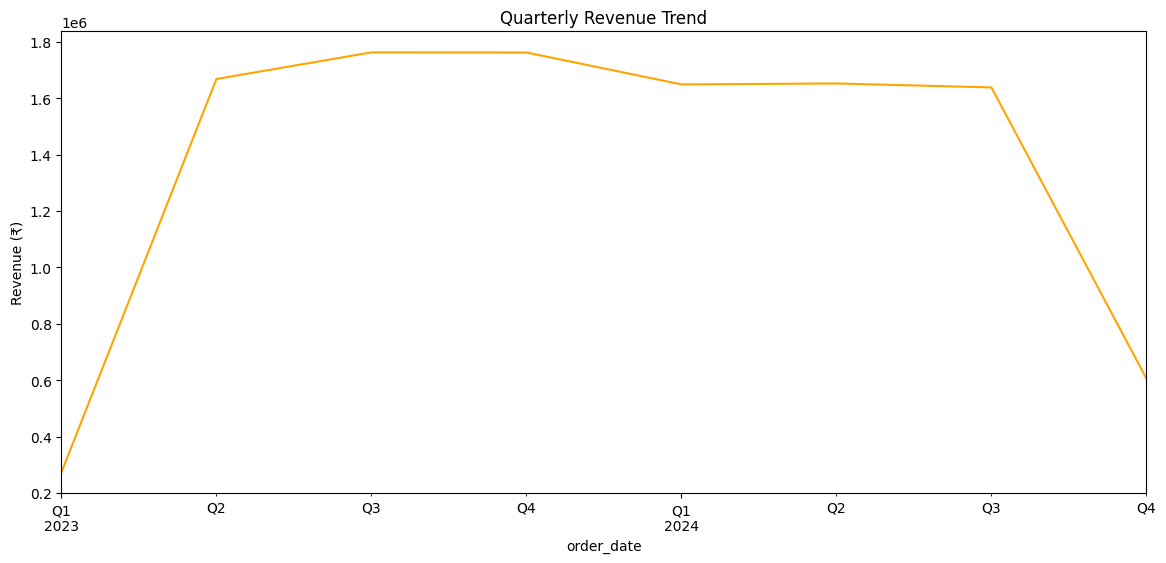

In [31]:
# Weekly and Quarterly Trends
print("\n📅 Weekly and Quarterly Trends:")

# Weekly Revenue
weekly_revenue = orders['order_total'].resample('W').sum()

# Quarterly Revenue
quarterly_revenue = orders['order_total'].resample('Q').sum()

# Plot Weekly
plt.figure(figsize=(14, 6))
weekly_revenue.plot(color='purple')
plt.title('Weekly Revenue Trend')
plt.ylabel('Revenue (₹)')
plt.show()

# Plot Quarterly
plt.figure(figsize=(14, 6))
quarterly_revenue.plot(color='orange')
plt.title('Quarterly Revenue Trend')
plt.ylabel('Revenue (₹)')
plt.show()



👥 Top Customers by Spending:
   customer_id  order_total   customer_name
0     22210238     21686.80  Rayaan Krishna
1     77869660     19052.94       Nidhi Sha
2      8791577     19028.36     Warda Kohli
3     26285589     18912.97      Bakhshi De
4     91196901     18856.11   Atharv Kurian
5     17805991     18409.90      Jhalak Rai
6     17597449     17857.34   Umang Dhingra
7     11478478     17719.29    Vedika Dugal
8     25128143     17638.83    Odika Kannan
9     67092149     17572.43     Daksh Atwal


C:\Users\abhis\AppData\Local\Temp\ipykernel_16740\4064312975.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers.head(10), x='order_total', y='customer_id', palette='coolwarm')


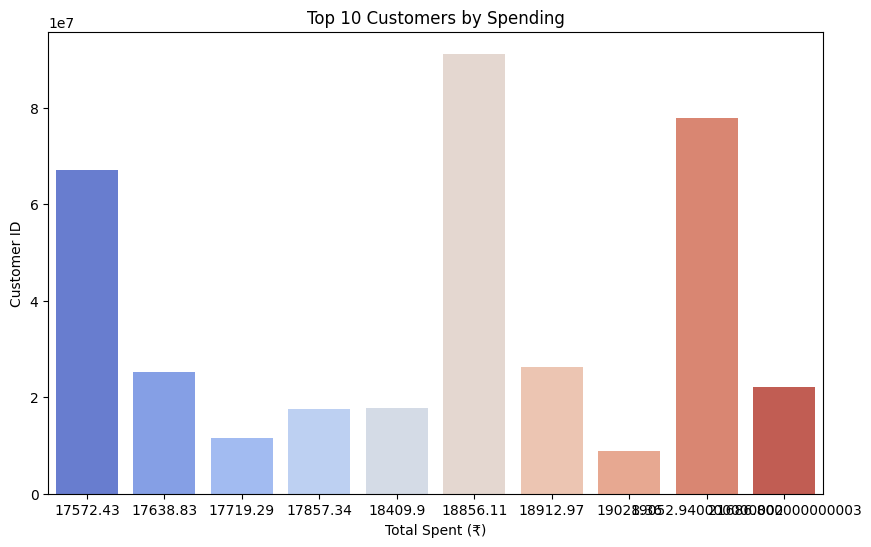

In [34]:
# Top Customers by Spending
print("\n👥 Top Customers by Spending:")

top_customers = (
    orders.groupby('customer_id')['order_total']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Merge customer names if needed
if 'customer_id' in customers.columns:
    top_customers = top_customers.merge(customers[['customer_id', 'customer_name']], on='customer_id', how='left')

print(top_customers.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers.head(10), x='order_total', y='customer_id', palette='coolwarm')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Total Spent (₹)')
plt.ylabel('Customer ID')
plt.show()
